# Underdevelopment level

1) **Feature Name:** gdo_rezsoc05
2) **Problem Type:** Classification
3) **Question:** Level of social underdevelopment in 2005 for a newly observed entity



*   **Feature Name:** gdo_rezsoc10
*   **Problem Type:** Classification
*   **Question:** Level of social underdevelopment in 2010 on a recently observed entity



![proof.png](attachment:624d3d0d-030a-43ed-89be-694176b45134.png)

Data extracted from: *https://datos.gob.mx/busca/dataset/indicadores-de-pobreza-pobreza-por-ingresos-rezago-social-y-gini-a-nivel-municipal1990-200-2010*


#KNN Implementation without special libraries

#### CSV Editing / Data preprocessing

Before writing any code, the CSV file was edited by hand to remove any unnecessary columns, particularly columns with data relating to years other than 2010, as well as columns with strings that are not needed for the purpose of this program.


**REMOVED COLUMNS:** *"ent," "nom_ent," "mun," "clave_mun," "nom_mun," "pobtot_ajustada," "pobtot_00," "pobtot_05," "porc_pob_15_analfa00," "porc_pob_15_analfa05," "porc_pob614_noasiste00," "porc_pob614_noasiste05," "porc_pob15_basicainc'0," "porc_pob15_basicainc05," "porc_pob_snservsal00," "porc_pob_snservsal05," "porc_vivpisotierra00," "porc_vivpisotierra05," "porc_vivsnsan00," "porc_vivsnsan05," "porc_snaguaent00," "porc_snaguaent05," "porc_vivsndren00," "porc_vivsndren05," "porc_vivsnenergia00," "porc_vivsnenergia05," "porc_vivsnlavadora00," "porc_vivsnlavadora05," "porc_vivsnrefri00," "porc_vivsnrefr05," "irez_soc00," "irez_soc05," "gdo_rezsoc00," "gdo_rezsoc05," "l_ocupnac00," "l_ocupnac05," "p_rez_edu_90," "p_rez_edu_00," "p_ser_sal_00," "p_viv_pisos_90," "p_viv_pisos_00," "p_viv_muros_90," "p_viv_muros_00," "p_viv_techos_90," "p_viv_techos_00," "p_viv_hacin_90," "p_viv_hacin_00," "p_viv_agu_entub_90," "p_viv_agu_entub_00," "p_viv_dren_90," "p_viv_dren_000," "p_viv_elect_90," "p_viv_elect_00," "pobreza_alim_90," "pobreza_alim_00," "pobreza_cap_90," "pobreza_cap_00," "pobreza_patrim_90," "pobreza_patrim_00," "gini_90," "gini_00".*

The column chosen to be the target as stated previously was "gdo_rezsoc10". This column was moved to the end of the dataset.

#### Importing and Loading Function

In [15]:
# Importing
from csv import reader #Allows us to read CSV files
from math import sqrt #Needed for distance calculations

We define our loading function, which takes a string representing the name of the CSV file as an argument. We then initialize an empty list inside the function to store the data from the CSV file. We open the file in read mode ('r'), create a csv_reader object and pass our file, then iterate through each row in the CSV file.

Inside the loop, the we check if the row is empty. If so, skip that iteration and move to the next row. If the row is not empty, appended it to the dataset. This is done to exclude any empty rows.

After all rows have been processed, we slice the dataset to exclude the header row, assuming that the first row contains column headers. If the dataset is empty, print a message to indicate that. Finally, we return the dataset.

In [16]:
# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file: # open in read mode ('r'),
        csv_reader = reader(file)
        for row in csv_reader:
            if not row: # Iterates through each row. If empty it skips the iteration.
                continue
            dataset.append(row) # Otherwise, it appends the row to the dataset.
        # Slicing the dataset
    if len(dataset) > 0:
        dataset = dataset[1:]  # Exclude the first row
    else:
        print("Dataset is empty or does not contain any rows.")
    return dataset

#### Detecting and replacing empty columns

We initialize two lists at the beginning of the function:
- **column_sums** to store the cumulative sums of values in each column.
- **column_counts** to keep track of the number of non-empty (numeric) values in each column.
Both lists are initialized with zeros, and their length is determined by the number of columns in the dataset.

With [:-1], we iterate trhough the elemnts of each row, excluding the last element, which is the last column, which is our target and the only column that has non-numeric labels (strings).

Each value in the row is checked to see if they are not "None". If the value is a non-empty string, then it is converted to float and the result is added to the corresponding column for that column index, then the count in "column_counts" increases by 1. If the value is an integer, it is simply added to the appropriate column sum and the "column_counts" count is increased by 1

After going through all of the rows, an empty list is created where the calculated averages are then stored. Next, the "column:sums" list is iterated through, and each sum is divided by the count (if greater than zero). If the count is 0 for a column (i.e., there were no valid numeric values in that column), it appends None to the column_averages list for that column.

Finally we return the column_averages list

In [17]:
def calculate_column_averages(dataset):
    column_sums = [0] * len(dataset[0])
    column_counts = [0] * len(dataset[0])

    for row in dataset:
        for col_idx, value in enumerate(row[:-1]):  # Last column is excluded
            if value is not None:
                if isinstance(value, str) and value.strip() != '':
                    column_sums[col_idx] += float(value)
                    column_counts[col_idx] += 1
                elif isinstance(value, (int, float)):
                    column_sums[col_idx] += value
                    column_counts[col_idx] += 1

    column_averages = []
    for i in range(len(column_sums)):
        if column_counts[i] > 0:
            average = column_sums[i] / column_counts[i]
            column_averages.append(average)
        else:
            column_averages.append(None)
    return column_averages

Iterating through each row and column of the dataset, we get the index of the row (row_idx) and the column (col_idx) using enumerate. For each value in the dataset, check if value is None, or, if value is an empty string ''. To ensure if the value is empty or missing data.

If the value is empty, the value is replaced with the corresponding column average from the column_averages list.

In [18]:
def replace_empty_spots_with_averages(dataset, column_averages):
    for row_idx, row in enumerate(dataset):
        for col_idx, value in enumerate(row[:-1]):  # Exclude the last column
            if value is None or value == '':
                dataset[row_idx][col_idx] = column_averages[col_idx]

**Detecting empty spots**

In this new section, we initialize a boolean variable to False, using it as a flag of whether any empty spots were detected in the dataset. Then iterate through the rows of the dataset and the columns of each row.

Just like before, for each value in the dataset, check if value is None or if value is an empty string ''. If an empty spot is detected, set empty_spots_detected to True.

When the argument becomes True, the row and column for the emtpy spot is printed, then the value of "empty_spots_detected" is returned.

In [19]:
def print_empty_spots(dataset, printempty):
    empty_spots_detected = False  # Initialize to False
    for row_idx, row in enumerate(dataset):
        for col_idx, value in enumerate(row[:-1]):  # Loop through each value in the row
            if value is None or value == '':
                empty_spots_detected = True  # Update to True if an empty spot is detected
                if printempty:
                    print(f"Empty spot at row {row_idx}, column {col_idx}")
    return empty_spots_detected

**Replacing empty spots**

First, we call the print_empty_spots function with the dataset and a boolean argument and assign the result to empty_spots_detected, then check the value of empty_spots_detected. If True, proceed to clean and impute the data. If it's False, print "No empty spots".

If empty spots were detected, print a message and separate it for clarity. Then calculate the column averages using the calculate_column_averages function and replace empty spots with the column averages using the replace_empty_spots_with_averages function. Finally print "Converting Done" to indicate that the process has finished.

In [20]:
def empty_reduction(dataset, printempty):
    empty_spots_detected = print_empty_spots(dataset, printempty)
    if empty_spots_detected:
        print("Converting empty spots to averages of the column")
        print("================================================")
        # Calculate column averages
        column_averages = calculate_column_averages(dataset)
        # Replace empty spots with column averages
        replace_empty_spots_with_averages(dataset, column_averages)
        print("Converting Done")
    else:
        print("No empty spots")

#### Data Preprocessing

In this section, we take a specified column for the current row, then remove any extra whitespace using strip(), and convert the string to float.

We need to convert strings of numbers into actual numerical values because we need to calculate the distance between datapoints.

In [21]:
def str_column_to_float(dataset, column):
    for row in dataset:
        cell = row[column]
        if isinstance(cell, str):  # Check if it's a string
            cell = cell.strip()
            if cell:  # Check if the stripped cell is not empty
                row[column] = float(cell)

We iterate through the dataset and create a list called ***class_values***, which contains all the values from that particular column. We then create a set called ***unique*** to store the unique values from the *class_values* list, to ensure that each unique value is considered only once.


We initialize an empty dictionary called "lookup". The dictionary will be used to link each unique string value to a unique integer. The key will be the string value, and the value will be the corresponding integer. We iterate through the unique values and fill the lookup dictionary, checking that the value is not an empty string or a space before adding it to the lookup. This is to avoid including missing or empty values in the lookup table.

We calculate the most common value in the *class_values* list using the max function with the key argument set to class_values.count. Then, we go through the entire dataset again. If the cell_value is None or an empty string, we replace it with the most common value in the column to handle missing data. If the cell_value is a valid non-empty string, replace it with the corresponding integer value from the lookup table.

Finally, return the lookup dictionary.

In [22]:
def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    most_common_value = max(set(class_values), key=class_values.count)

    for i, value in enumerate(unique):
        if value != '' and value != ' ':
            lookup[value] = i

    for row in dataset:
        cell_value = row[column]
        if cell_value is None or cell_value == '':
            row[column] = most_common_value
        else:
            row[column] = lookup[cell_value]
    return lookup

We create an empty list to store the minimum and maximum values for each column, then go through the columns of the dataset using range(len(dataset[0])) to iterate from 0 to the number of columns in the first row of the dataset. Inside the loop, we create a col_values list by going through each row in the dataset and selecting the value at the current column index (i) for each row.

We then calculate the minimum and maximum values in the col_values list and append them to the minmax list. After processing all columns, return the minmax list.

In [23]:
# Find the min and max values for each column
def dataset_minmax(dataset):
    minmax = list() # empty list to store the min / max values for each column.
    for i in range(len(dataset[0])): # Iterates through each column of the dataset
        col_values = [row[i] for row in dataset] # Extracts the values from the current column
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax

For each value in the dataset, rescale the value to [0, 1].

Subtract the minimum for that column *(minmax[i][0])* from the value, then divide by the range of values for that column *(minmax[i][1] - minmax[i][0])*.

Then reassign back to the original location in the dataset *(row[i])*.

In [24]:
# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)): # Iterates through each row in the dataset and then through each column within that row.
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

The first step for KNN is to calculate the distance between two rows in a dataset. The smaller the value, the more similar the two will be. A value of 0 means that there is no difference.

In [25]:
# Calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1) - 1):
        distance += (row1[i] - row2[i]) ** 2
    return sqrt(distance)

After, we need to calculate the distance between each observation in the dataset to the new piece of data. Then sort all of the observations in the training dataset by their distance to the new data.

We select the top *k* to return as the most similar neighbors.

Here, lambda defines an anonymous function that takes a single tuple and returns the second element of the tuple, *tup[1]*. The data point and its distance from the test_row are added as a tuple to the distances list.

In [26]:
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list() # Initialize an Empty List for Distances
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

After identifying the classes of the K nearest neighbors for a given data point, we have a list of output values representing the classes of these neighbors.

The max() function is then applied to this list of output values to return the maximum value in that list (in this case, the classes).

**train:** The training dataset containing labeled data points.

**test_row:** The data point for the prediction.

**num_neighbors:** The number of nearest neighbors to consider for the prediction.

In [27]:
# Make a prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count) # finds the most common output label
    return prediction

#### Main Code

Load a CSV dataset from the file, then iterate through each column excluding the last, which is the target variable. Inside the loop, call the str_column_to_float function to convert each string value in the column to a floating-point number.

Then call the empty_reduction function to detect and handle empty or missing values, with False as the printempty argument so it does not print information about empty spots.

Call the str_column_to_int function to convert the target variable from string labels to integer representations. Set num_neighbors to 5 nearest neighbors during the classification. Set a new observation, ***row***, as new data for a classification prediction.

Call predict_classification to make a classification prediction for the row data. The predicted label is stored and we then print the new observation (row) and the predicted label.

In [28]:
filename = './datasets/Indicadores_municipales.csv'
dataset = load_csv(filename)

for i in range(len(dataset[0])-1): # iterate through each column excluding the target variable
    str_column_to_float(dataset, i) # convert string to float.

empty_reduction(dataset, False)

# Convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)

# Define Neighbors
num_neighbors = 5
# Define a new observation
row = [20.3309874, 6.312496265, 16.01849139, 20.03520906, 7.216375202, 15.41742921, 27.00382583, 21.8836851, 28.55256295,
       16.94836957, 4.465343332, 51.86079564, 20.36619717, 79.75088181, 74.54736258, 4.592411399, 2363, 1239, 46668, 6778,
       20891, 11920, 3626, 29946, 16723, 16965, 86306, 52352, 6303, 74357, 80588, 20041, 14295, 33504, 125, 312,
       1.370063305, 2.641284704, 3.160161018, 5.847710371, 5.7240417, 1.696373701, 1.382647991, 3.536691666, 5.998271704,
       1.854506731, 1.070803642, 4.496376753, 4.08946681, 4.604298115, 75589, 3.83435297, 2.575343132, 21.29608154,
       20.60673904, 1.707235098, 17.3696003, 2.168817043, 1.037015915, 15.72911072, 23.89793015, 14.16432953, 2.289044291,
       777, 62.4, 28.8, 44.1, 27.4, 11.9, 20.6, 20.6, 7.5, 4, 10.3, 18.7, 24.6, 0.202]


# Predict the label
label = predict_classification(dataset, row, num_neighbors)
print('Data=%s, Predicted: %s' % (row, label))

Converting empty spots to averages of the column
Converting Done
Data=[20.3309874, 6.312496265, 16.01849139, 20.03520906, 7.216375202, 15.41742921, 27.00382583, 21.8836851, 28.55256295, 16.94836957, 4.465343332, 51.86079564, 20.36619717, 79.75088181, 74.54736258, 4.592411399, 2363, 1239, 46668, 6778, 20891, 11920, 3626, 29946, 16723, 16965, 86306, 52352, 6303, 74357, 80588, 20041, 14295, 33504, 125, 312, 1.370063305, 2.641284704, 3.160161018, 5.847710371, 5.7240417, 1.696373701, 1.382647991, 3.536691666, 5.998271704, 1.854506731, 1.070803642, 4.496376753, 4.08946681, 4.604298115, 75589, 3.83435297, 2.575343132, 21.29608154, 20.60673904, 1.707235098, 17.3696003, 2.168817043, 1.037015915, 15.72911072, 23.89793015, 14.16432953, 2.289044291, 777, 62.4, 28.8, 44.1, 27.4, 11.9, 20.6, 20.6, 7.5, 4, 10.3, 18.7, 24.6, 0.202], Predicted: 2


### Loss and Optimization Functions

A loss function is used to measure the accuracy of a model’s predictions. It calculates the difference between the predicted output and the actual output for each training sample.

KNN does not inherently involve a loss function in the same way as supervised learning models.
No function is fitted to the data, and so, no optimization is done

However we can calculate the accuracy of our predictions.

Cross-validation is a way to evaluate the performance of the KNN model

In [29]:
# Importing
from random import seed
from random import randrange

"Folds" refers to the subdivisions into which a dataset is divided for evaluating

For each fold, we iterate n times. Within each iteration, we create a new fold and populate it with fold_size samples randomly selected from the dataset copy.

We use randrange to select a random index from dataset_copy, and add it to the fold. We then remove it from dataset_copy to avoid duplication.

Finally, the fold is added to dataset_split.

In [30]:
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds) # Calculates the size of each fold
    for _ in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy)) # select a random index from dataset_copy
            fold.append(dataset_copy.pop(index)) # remove from dataset_copy to avoid duplication.
        dataset_split.append(fold)
    return dataset_split

Predict the labels for the test dataset using the KNN algorithm. Initialize an empty list to store the predicted class labels for each data point in the test dataset.

For each data point in the test dataset, call predict_classification. Append prediction to predictions list, continue this process for all data points in the test dataset.

In [31]:
# kNN Algorithm
def k_nearest_neighbors(train, test, num_neighbors):
    predictions = list()
    for row in test:
        output = predict_classification(train, row, num_neighbors)
        predictions.append(output)
    return predictions

Comparing the predicted labels with the actual labels

Initialize a variable to keep track of the number of correct predictions. For each data point, check if the actual label in the actual list (at index i) matches the predicted label in the predicted list (at index i). If they match, it means the prediction is correct, and ***correct*** is incremented by 1.

After looping through all data points, calculate the accuracy percentage.

In [32]:
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0 # keep track of correct predictions
    for i in range(len(actual)):
        if actual[i] == predicted[i]: #  check if the actual label matches the predicted label
            correct += 1
    return correct / float(len(actual)) * 100.0 # get percentage

Here we apply Cross-validation, which is when the dataset is randomly split up into 'k' groups. One of the groups is used as the test set and the rest are used as the training set.

Call cross_validation_split with the dataset and n_folds arguments. For each fold, a training set and a test set are created. The training set is constructed by combining all the folds except the current fold. The line train_set = sum(train_set, []) is used to concatenate the lists representing each fold into a single training set list.

A separate test set is created for each fold by copying the data points from the fold. Each row in the fold is copied to the test set, and the class label (the last element in each row) is set to None to simulate a scenario where the true labels are hidden during testing.

The algorithm function is then called with the training set and test set for the current fold, we return predictions for the test set. The actual class labels for the test set are extracted from the current fold, and the accuracy_metric function is used to calculate the accuracy score by comparing the actual and predicted labels.

The accuracy score is appended to the scores list for the current fold. After looping through all the folds, we return the list of evaluation scores, one for each fold.

In [33]:
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds) # create a training set by combining all folds except the current fold.
        train_set.remove(fold)
        train_set = sum(train_set, []) # separate the current fold as the test set.
        test_set = list()
        for row in fold: # preparing the test set by creating a copy of each row in the fold
            row_copy = list(row)
            test_set.append(row_copy) # Add copied row to the test_set
            row_copy[-1] = None # remove the label from the row
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold] # Extract the actual labels from the current fold.
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores

KNN itself doesn't have an usual training phase with model parameters, but cross-validation helps in understanding how well the algorithm performs.

#### Main Code

seed(1) is called to set the random seed for any random number generation in the code.
The rest of the steps are the same as the previous example above, with the only exception that we print out the information about empty spots.

In [34]:
# Test the kNN on the Iris Flowers dataset
seed(1)
filename = './datasets/Indicadores_municipales.csv'
dataset = load_csv(filename)

# Convert columns to appropriate data types
for i in range(len(dataset[0])-1):
    str_column_to_float(dataset, i)

# Convert empty column data to the aveargae of said column
empty_reduction(dataset, True) # False = Do Not Print empty rows

# Convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)

Empty spot at row 1044, column 43
Empty spot at row 1990, column 43
Converting empty spots to averages of the column
Converting Done


{'Muy bajo': 0, 'Muy alto': 1, 'Bajo': 2, 'Alto': 3, 'Medio': 4}

Set the number of folds and nearest neighbors to 5.
Call evaluate_algorithm function, return a list of accuracy scores, where each score corresponds to the performance of the k-NN algorithm on a different fold of the dataset.

Print out the list of accuracy scores obtained from cross-validation. Then calculate the mean accuracy by taking the sum of all the accuracy scores and dividing it by the total number of scores, this gives the average accuracy over all folds.

In [35]:
# Evaluate the algorithm
n_folds = 5
num_neighbors = 5
scores = evaluate_algorithm(dataset, k_nearest_neighbors, n_folds, num_neighbors)

print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [64.76578411405295, 68.22810590631364, 67.20977596741345, 68.63543788187373, 64.15478615071282]
Mean Accuracy: 66.599%


## KNN Using SciKit Learn

Scikit-learn, is a machine learning library in Python. Among its diverse set of algorithms, k-Nearest Neighbors (KNN) stands as one of the simplest yet effective classification and regression methods.
We'll focus on using scikit-learn to apply KNN in practice, examining the steps required to prepare data, train a KNN model, and evaluate its performance. We'll also touch on key considerations, such as selecting the appropriate number of neighbors.

We use %reset to clear out saved variables and restart the kernel

In [36]:
# Clear data
%reset -f

We import the necessary packages for this section

1. **Pandas (pd)**:
    - Pandas is used for working with structured data, including loading, exploring, and preprocessing datasets.

2. **scikit-learn (sklearn)**:
   - Scikit-learn is a comprehensive machine learning library that provides tools for data preprocessing, modeling, evaluation, and more.

4. **NumPy (numpy)**:
   - NumPy is used for numerical operations, including working with arrays and mathematical operations.

5. **Seaborn (sns) and Matplotlib (plt)**:
   - Seaborn and Matplotlib are used for data visualization and plotting.

6. **Warnings**:
   - The warnings package is used for warning output manipulation.

7. **StandardScaler, LabelEncoder**:
   - StandardScaler is used for feature scaling, while LabelEncoder is used for encoding categorical variables.

In [37]:
import pandas as pd  # For working with data frames
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
import numpy as np  # For numerical operations
import seaborn as sns  # For plotting
import matplotlib.pyplot as plt  # For plotting
import warnings # For warning output manipulation

Loading the dataset as a pandas DataFrame

In [38]:
# Load a CSV dataset
df = pd.read_csv("./datasets/Indicadores_municipales.csv")

Here we split a dataset into two components: the feature matrix ***X*** and the target variable vector ***y***.

The purpose of ***X*** is to store the feature matrix, which includes all the features used to make predictions. We create it by dropping the 'gdo_rezsoc05' (target) column from the DataFrame.

The ***y*** variable stores the target variable, we assign it the values of the 'gdo_rezsoc05' column from the DataFrame.

In [39]:
# Split the data into features (X) and target (y)
X = df.drop('gdo_rezsoc10', axis=1)
y = df['gdo_rezsoc10']

We calculate the column-wise averages for all columns in the feature matrix ***X***, and then replace empty, NaN (Not a Number), or whitespace (' ') entries in the same matrix with their respective column averages.

In [40]:
# Calculate the column-wise averages for all columns except the target column
column_means = X.mean()

# Replace empty, NaN, or ' ' entries with the column average
X = X.fillna(column_means).replace(' ', column_means)

We create a new variable *y_non_empty* that contains only the non-empty and non-whitespace class labels from the original y. This step is performed to exclude empty or ' ' labels when calculating the most common class label and when replacing empty labels later.

*most_common_label* determines the most common class label in the *y_non_empty* variable. We first use the *value_counts()* method to count the occurrences of each unique class label and then return the index (class label) associated with the maximum count.

*y = y.copy()* creates a copy of the original y to avoid potential issues associated with the SettingWithCopyWarning. *y.loc[y == ' ']* replaces any empty or ' ' class labels in the original ***y*** with the most common class label found.

In [41]:
# Ignore empty or ' ' when assigning unique class labels
y_non_empty = y[y != ' ']

# Find the most common class label
most_common_label = y_non_empty.value_counts().idxmax()

# Replace empty or ' ' entries with the most common class label
y = y.copy()  # Create a copy of y to avoid SettingWithCopyWarning
y.loc[y == ' '] = most_common_label

*le = LabelEncoder()* creates an instance of the LabelEncoder class where we then apply the label encoding transformation to the target variable ***y***. It assigns a unique numerical label to each distinct class in the target variable.

*train_test_split* is a function from scikit-learn used for splitting a dataset into training and test sets. ***X*** is the feature matrix, and ***y*** is the target variable with encoded labels. *test_size=0.2* specifies that 20% of the data will be allocated to the test set, and the remaining 80% will be used for training. The data is randomly shuffled before the split. *random_state=0* sets a random seed to ensure that the data split is reproducible.

In the end we are left with four sets:
- X_train: The feature matrix for training.
- X_test: The feature matrix for testing.
- y_train: The target variable (with encoded labels) for training.
- y_test: The target variable (with encoded labels) for testing.

In [42]:
# Encode the labels using LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

Create an instance of the StandardScaler class. Standardization (or z-score normalization) involves transforming the data so that it has a mean of 0 and a standard deviation of 1. It centers the data around the mean and scales it to have consistent units.

The fit_transform method is used to both fit the scaling parameters (mean and standard deviation) to the training set and transform the training set's features simultaneously. The result is that the features in X_train are standardized. The transform method on the test set is used to apply the scaling parameters obtained from the training set. This ensures that the same scaling is applied consistently to both the training and test sets.

In [43]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Initialize a KNN classifier and specify the number of nearest neighbors to consider when making predictions (in this case 5). *knn.fit(X_train, y_train)* trains the KNN classifier. *X_train* represents the training set's feature matrix, and *y_train* represents the class labels.

*y_pred = knn.predict(X_test)* applies the trained KNN classifier to the test set. For each data point in X_test, the KNN algorithm identifies the k (in this case, 5) nearest neighbors from the training data, and the class label that occurs most frequently among these neighbors is assigned as the predicted class label for the test data point. The predicted labels are stored in the y_pred variable.

In [44]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

Calculate the accuracy of the model.

The accuracy_score function from scikit-learn is used to compare the true labels (y_test) and the predicted labels (y_pred) and compute the accuracy, which is the ratio of correctly predicted labels to the total number of data points in the test set.

In [45]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy * 100, 3)
print("Accuracy: {:.3f}%".format(accuracy_percentage))

Accuracy: 81.301%


#### Cross-Validation

Stratified cross-validation is a variation of the k-fold cross-validation technique, the dataset is divided into k subsets (folds) just like regular k-fold cross-validation. However, the key difference is that it ensures that each fold maintains the same class distribution as the original dataset.

- If the dataset has 80% class A and 20% class B, there's a chance that one or more folds may have a very low representation of class B (e.g., 100% class A).
- In stratified cross-validation, the algorithm will ensure that each fold roughly maintains the 80-20 class distribution. So, each fold will have a similar proportion of class A and class B instances.

We perform stratified cross-validation for different values of k and then calculate the accuracy scores, this allows us to evaluate the performance of a K-Nearest Neighbors (KNN) classifier for various values of the n_neighbors parameter (k). The accuracy scores are then plotted on a line graph to help us select the best value of k.

Suppressing a specific warning message related to class population in scikit-learn.

In [46]:
# Suppress the specific warning about the least populated class
warnings.filterwarnings("ignore", message="The least populated class in y has only 2 members")

Generate a list of k values ranging from 1 to 30 (inclusive). Then initialize an empty list called scores to store the mean cross-validation scores for each value of k.

We then scale the features in the matrix ***X*** using the StandardScaler.

In [47]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

For each k, we do the following:

We create an instance of StratifiedKFold and a KNN classifier with the current value of k. This classifier will be used for cross-validation.

The cross_val_score function performs cross-validation, where the dataset is split into multiple "folds" for training and testing. It returns an array of scores, one for each fold. ***np.mean(score)*** calculates the mean of the cross-validation scores obtained from the different folds.

The mean score represents the model's performance with the current k value. We then adds the mean score to the scores list.

In [48]:
for k in k_values:
    # Create a StratifiedKFold instance for stratified cross-validation
    stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=stratified_cv)
    scores.append(np.mean(score))

We use the sns.lineplot function from the Seaborn library to generate a line plot (self-explanatory).

*x=k_values* specifies that the k values (the values tested during hyperparameter tuning) will be used as the x-axis values in the plot. *y=scores* represents the mean accuracy scores associated with each value of k, and these scores will be displayed on the y-axis. *marker='o'* specifies that data points on the line plot will be marked with circular markers.

Text(0, 0.5, 'Accuracy Score')

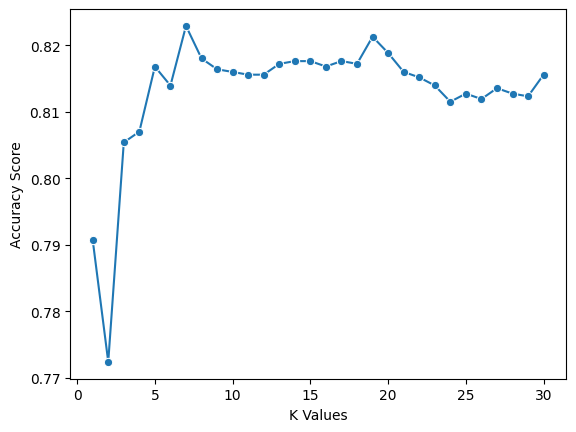

In [49]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

By assessing the relationship between different values of k and the corresponding mean accuracy scores, We can identify the optimal value of k that maximizes the model's accuracy.

We use NumPy's *np.argmax(scores)* to return the index where the maximum mean accuracy score is located in the scores list, and *best_k* is assigned the value of k associated with the index.

We then train with the newly obtained K values for maximum accuracy.

In [50]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

Calculate accuracy of the model with the new K values

In [51]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro')

# Formatting output
accuracy_percentage = round(accuracy * 100, 3)

print("Accuracy:", accuracy_percentage, "%")
print("Precision: {:.4f}..".format(precision))
print("Recall: {:.4f}..".format(recall))

Accuracy: 82.52 %
Precision: 0.8563..
Recall: 0.7760..


#### Let's clarify these results...

**Accuracy:** Accuracy measures the overall correctness of the model by calculating the ratio of correctly predicted instances to the total number of instances.

- (Number of Correct Predictions) / (Total Number of Predictions)

**Precision:** Precision is a measure of how many of the predicted positive instances were actually positive. High precision means that when the model predicts a positive class, it's more likely to be correct.

- (True Positives) / (True Positives + False Positives)

**Recall (Sensitivity or True Positive Rate):** Recall measures how many of the actual positive instances were correctly predicted as positive. High recall means the model is good at finding positive instances, but it may produce more false positives.

- (True Positives) / (True Positives + False Negatives)

There's often a trade-off between precision and recall. We can adjust this trade-off by changing the model's threshold for classifying instances, such as the choice of **k**

For example, choosing a small **k** usually leads to High Precision, whereas choosing a large **k** usually leads to High Recall. This is why we use cross-validation to find the **k** value that fits our model best

## Conclusions

My main issue with this project is my lack of programming knowledge, it was difficult for me to understand some of the concepts required for the predictor implementation. I collaborated with a classmate for this project, and I now have a better grasp at the concepts of kNN and classification problems.

In the case of using Machine Learning, specifically kNN, it is significantly useful for image and object recognition. Using it to identify and recognize faces, objects like flowers, floors, products, and the like. kNN can be applied to many labelling or classification problems and get results.

In [53]:
%%shell
jupyter nbconvert --to html /content/gdo_rezsoc10_KNN.ipynb

[NbConvertApp] Converting notebook /content/gdo_rezsoc10_KNN.ipynb to html
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/jupyter_core/application.py", line 280, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 423, in start
    self.convert_notebooks()
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 597, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 560, in convert_single_notebook
    output, resources = self.export_single_notebook(
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py"

CalledProcessError: ignored